<h1 align=center>Health Insurance to Auto-Insurance Cross-Sell</h1>

<img src='autoinsur.jpg'>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Health-Insurance-to-Auto-Insurance-Cross-Sell" data-toc-modified-id="Health-Insurance-to-Auto-Insurance-Cross-Sell-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Health Insurance to Auto-Insurance Cross-Sell</a></span></li><li><span><a href="#Business-Case-" data-toc-modified-id="Business-Case--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Case <a name="businesscase"></a></a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data<a name="data"></a></a></span></li><li><span><a href="#EDA-" data-toc-modified-id="EDA--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA <a name="eda"></a></a></span><ul class="toc-item"><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Feature Engineering</a></span></li></ul></li><li><span><a href="#Train-Test-Split-" data-toc-modified-id="Train-Test-Split--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train-Test Split <a name="traintest"></a></a></span></li><li><span><a href="#Class-Imbalance-" data-toc-modified-id="Class-Imbalance--6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Class Imbalance <a name="classimb"></a></a></span></li><li><span><a href="#Model-" data-toc-modified-id="Model--7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model <a name="model"></a></a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>K-Nearest Neighbors</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li><li><span><a href="#Catboost-Classifier" data-toc-modified-id="Catboost-Classifier-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Catboost Classifier</a></span></li></ul></li><li><span><a href="#Best-Model-Evaluation-" data-toc-modified-id="Best-Model-Evaluation--8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Best Model Evaluation <a name="bestmodel"></a></a></span><ul class="toc-item"><li><span><a href="#SHAP-Explainer" data-toc-modified-id="SHAP-Explainer-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>SHAP Explainer</a></span></li><li><span><a href="#Important-Take-Aways" data-toc-modified-id="Important-Take-Aways-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Important Take-Aways</a></span></li><li><span><a href="#The-Recommendations" data-toc-modified-id="The-Recommendations-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>The Recommendations</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
from tqdm import tqdm_notebook as tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import markdown
from markdown_checklist.extension import ChecklistExtension
source = 'checklist.js'
html = markdown.markdown(source, extensions=[ChecklistExtension()])

In [299]:
def test_scores_plots(model, X_test, y_true, model_name, plot=True, fast=False):
    
    """
    Function that takes in a model, the X_test split, y_true values, and the name
    of the type of model used. It will score AUC ROC, Accuracy, F1 Score, and 
    display the confusion matrix for the passed, fitted model. Optionally can plot the ROC AUC curve
    and Precision-Recall Curve
    
    --------------------------------
    Model[model] - Talkes in an Sklearn fitted model
    X_test[Dataframe or array-like] - Takes in X values fed into the fitted model
    y_true[Dataframe or array-like] - True values to compare against
    model_name[string] - Name of the type of model being passed
    Plot[boolean](optional) - Plots ROCAUC and Precision Recall curve
    --------------------------------
    """
    
    ## Prediction and probabilities 
    probas = model.predict_proba(X_test)
    probas = probas[:, 1]
    pred_y = model.predict(X_test)
    
    ## ROC AUC score
    auc_score = roc_auc_score(y_test, probas)
    print('{}: ROC AUC = {}%'.format(model_name, round((auc_score*100),2)))
    
    ## ROC AUC Curve
    fpr, tpr, thresholds = roc_curve(y_test, pred_y)
    if plot:
        if fast:
            ## ROC AUC Matplotlib
            plt.plot(fpr, tpr, marker='.')
            plt.title('ROC AUC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.show()
            
            ## Precision Recall Matplotlib
            precision, recall, thresholds = precision_recall_curve(y_test, pred_y)
            plt.plot(recall, precision, marker='.', label='Decision Tree')
            plt.title('Precision Recall Curve')
            plt.show()
            
        ## Precision/Recall & ROC Curve Sklearn
        plot_precision_recall_curve(model, X_test, y_true)
        plt.title('Precision-Recall Curve')
        plt.show()
        plot_roc_curve(model, X_test, y_true)
        plt.title('ROC Curve')
        plt.show()
        
    ## Confusion Matrix
    print('Confusion Matrix:')
    display(confusion_matrix(y_test, pred_y))
    print('Normalized Confusion Matrix:')
    display(confusion_matrix(y_test, pred_y, normalize='true'))
#     plot_confusion_matrix(estimator=model, )
    
    
    print(metrics.classification_report(y_true, pred_y))
    
    ## Accuracy
    acc = accuracy_score(y_test, pred_y)
    print('{}: Accuracy score = {}%'.format(model_name, round((acc*100),2)))
    
    ## F1 Score
    f1 = f1_score(y_test, pred_y)
    print('{}: F1 Score = {}%'.format(model_name, round((f1*100),2)))
    
    return auc_score

<img src='traffic.jpg'>

# Business Case <a name="businesscase"></a>

[Kaggle Dataset](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction)

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Data<a name='data'></a>

<img src='datadefs.png'>

This dataset was sourced from Kaggle and was provided as part of a Hack-a-Thon from another website. This dataset is very clean and provides some very interesting insights into customer demographics and current policy information. We take a look through the dataset and use the features described above to predict our target classes in `Response`.

In [5]:
insur = pd.read_csv('Insur/train.csv')

In [6]:
insur

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
print('Number of rows: '+ format(insur.shape[0]) +', number of features: '+ format(insur.shape[1]))

Number of rows: 381109, number of features: 12


In [8]:
imbalance = round(insur['Response'].value_counts()[1]/insur['Response'].value_counts()[0]*100,3)
imbal1, imbal0 = insur['Response'].value_counts()[1], insur['Response'].value_counts()[0]
print('Total imbalance, target class is: {}%'.format(imbalance))
print(imbal1, imbal0)

Total imbalance, target class is: 13.968%
46710 334399


In [9]:
pd.DataFrame(insur.isnull().sum())

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [10]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
C = (insur.dtypes == 'object')

In [12]:
cat_cols = list(C[C].index)

In [13]:
cat_cols

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [14]:
for col in cat_cols:
    display(pd.DataFrame(insur[col]))

,Gender
0,Male
1,Male
2,Male
3,Male
4,Female
...,...
381104,Male
381105,Male
381106,Male
381107,Female


,Vehicle_Age
0,> 2 Years
1,1-2 Year
2,> 2 Years
3,< 1 Year
4,< 1 Year
...,...
381104,1-2 Year
381105,< 1 Year
381106,< 1 Year
381107,> 2 Years


,Vehicle_Damage
0,Yes
1,No
2,Yes
3,No
4,No
...,...
381104,No
381105,No
381106,No
381107,Yes


Our look at our features has returned a feature that is encoded as an `object` but should be changed to a numeric. `Vehicle_Age` is distributed into 3 bins. Vehicles less than 1 year old, vehicles between 1 and 2 years old, and vehicles older than 2 years. Let's fix that so we can include that column in our numeric data. Furthermore we will encode the data for `Vehicle_damage` and `Gender`. It is important to pass our features in some sort of numeric form as most models do not accept `string` features yet.


In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()

In [17]:
insur['Vehicle_Age'] = le.fit_transform(insur['Vehicle_Age'])

In [18]:
le.classes_

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

In [19]:
insur['Vehicle_Age'] = insur['Vehicle_Age'].astype('int64')

In [20]:
insur['Gender'] = le.fit_transform(insur['Gender'])
print(le.classes_)
insur['Gender'] = insur['Gender'].astype('int64')

['Female' 'Male']


In [21]:
insur['Vehicle_Damage'] = le.fit_transform(insur['Vehicle_Damage'])
print(le.classes_)
insur['Vehicle_Damage'] = insur['Vehicle_Damage'].astype('int64')

['No' 'Yes']


Okay, now we have encoded our data into a more usable format for our future modeling.

In [22]:
intnum = (insur.dtypes == 'int64')
floatnum = (insur.dtypes == 'float64')
intnum = list(intnum[intnum].index)
floatnum = list(floatnum[floatnum ].index)

In [23]:
num = intnum + floatnum

In [24]:
num

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Vintage',
 'Response',
 'Region_Code',
 'Annual_Premium',
 'Policy_Sales_Channel']

<img src='explore.png'>

# EDA <a name='eda'></a>

Below we look at several of the features to see what general data is available in this dataset. 

The first major data point is the `Response` target feature. What we see is the major class imbalance between the yes and no responses to the cross-sell attempt. So it is important to look for information like this, as things such as class imbalance are major issues during modeling.



In [25]:
insur.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

Heavy class imbalance.

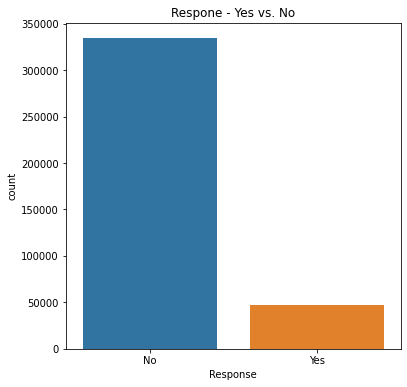

In [26]:
fig, ax = plt.subplots(1,1,figsize=(6,6)) 
sns.countplot(data=insur, x='Response')
plt.title('Respone - Yes vs. No')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()

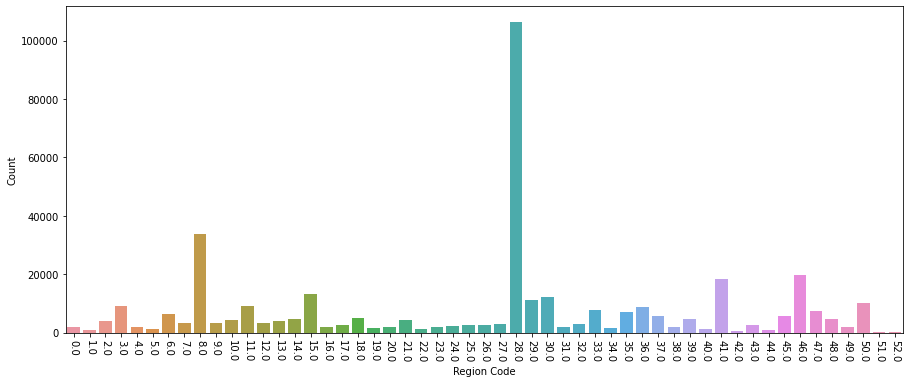

In [27]:
fig, ax =plt.subplots(1,1,figsize=(15,6))
sns.countplot(data=insur,x='Region_Code',ax=ax)
plt.xticks(rotation=-90)
plt.xlabel('Region Code')
plt.ylabel('Count')
fig.show()

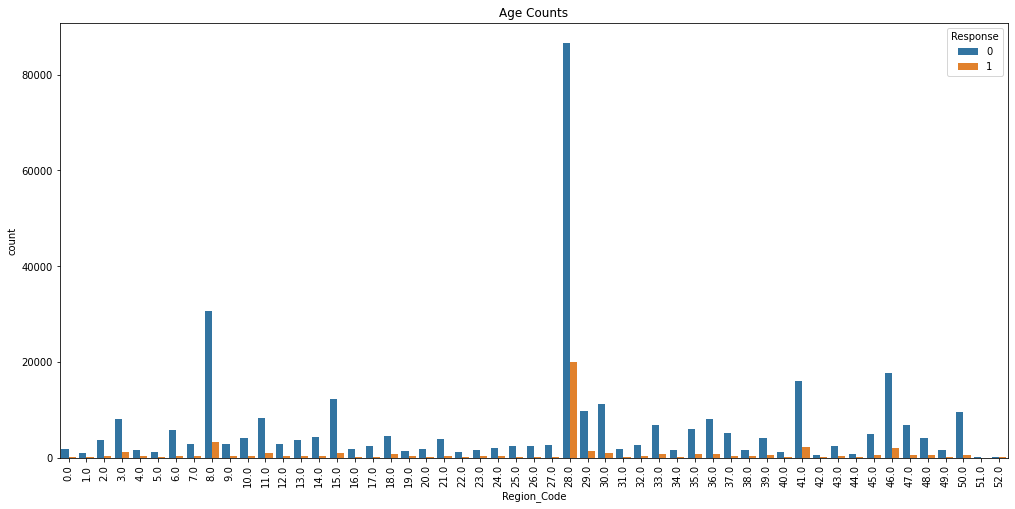

In [28]:
fig, ax = plt.subplots(1,1,figsize=(17,8))
sns.countplot(data=insur, x='Region_Code', hue='Response', ax=ax)
plt.title('Age Counts')
plt.xticks(rotation=90)
fig.show()

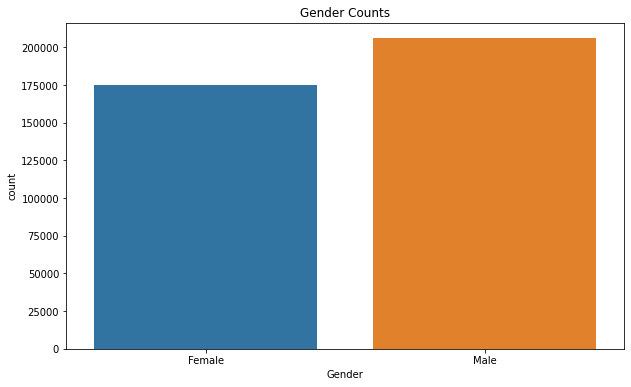

In [29]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=insur, x='Gender', ax=ax)
plt.title('Gender Counts')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
fig.show()

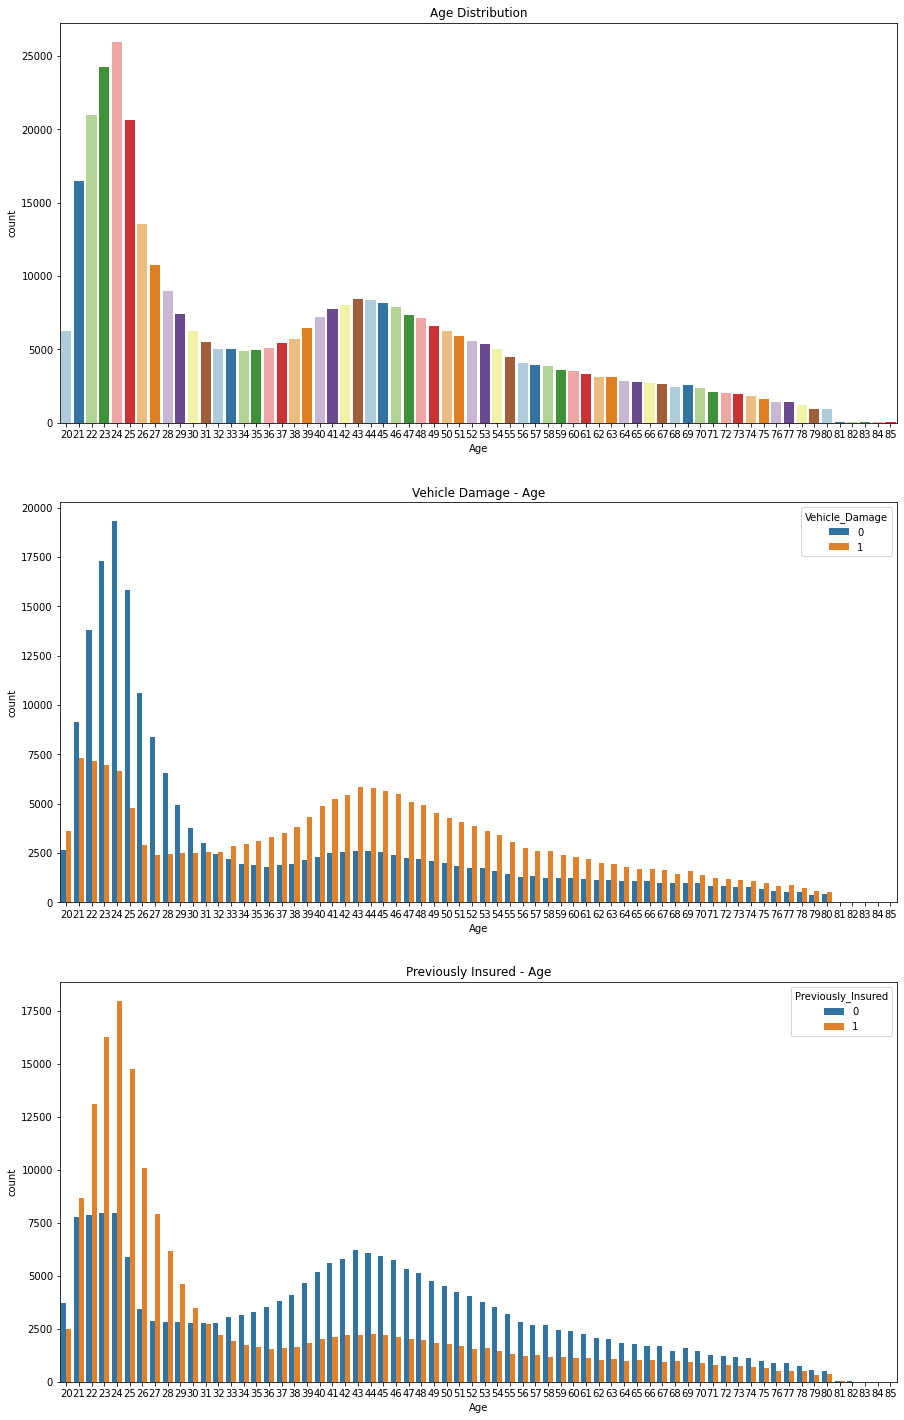

In [283]:
fig, ax =plt.subplots(3,1,figsize=(15,25))
sns.countplot(data=insur, x='Age', ax=ax[0], palette='Paired')
sns.countplot(data=insur,x='Age',hue='Vehicle_Damage',ax=ax[1])
sns.countplot(data=insur,x='Age',hue='Previously_Insured',ax=ax[2])
ax[0].set_title('Age Distribution')
ax[1].set_title('Vehicle Damage - Age')
ax[2].set_title('Previously Insured - Age')
fig.show()

In [31]:
mean = insur.groupby('Response').mean()
mean

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
Response,,,,,,,,,,,
0,190611.255476,0.530994,38.178227,0.997694,26.336544,0.521742,0.538859,0.438653,30419.160276,114.851040,154.380243
1,190152.264504,0.610683,43.435560,0.999122,26.762963,0.003383,0.355513,0.978977,31604.092742,91.869086,154.112246


<AxesSubplot:xlabel='Vintage', ylabel='Count'>

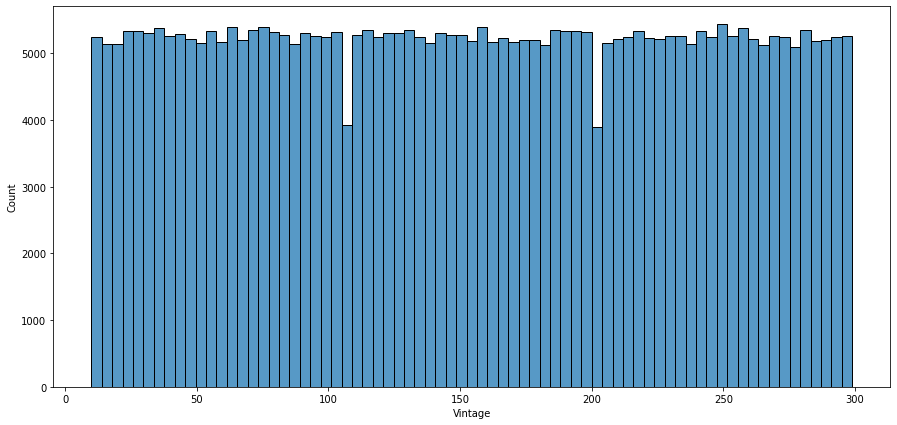

In [32]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
sns.histplot(data=insur, x='Vintage', ax=ax)

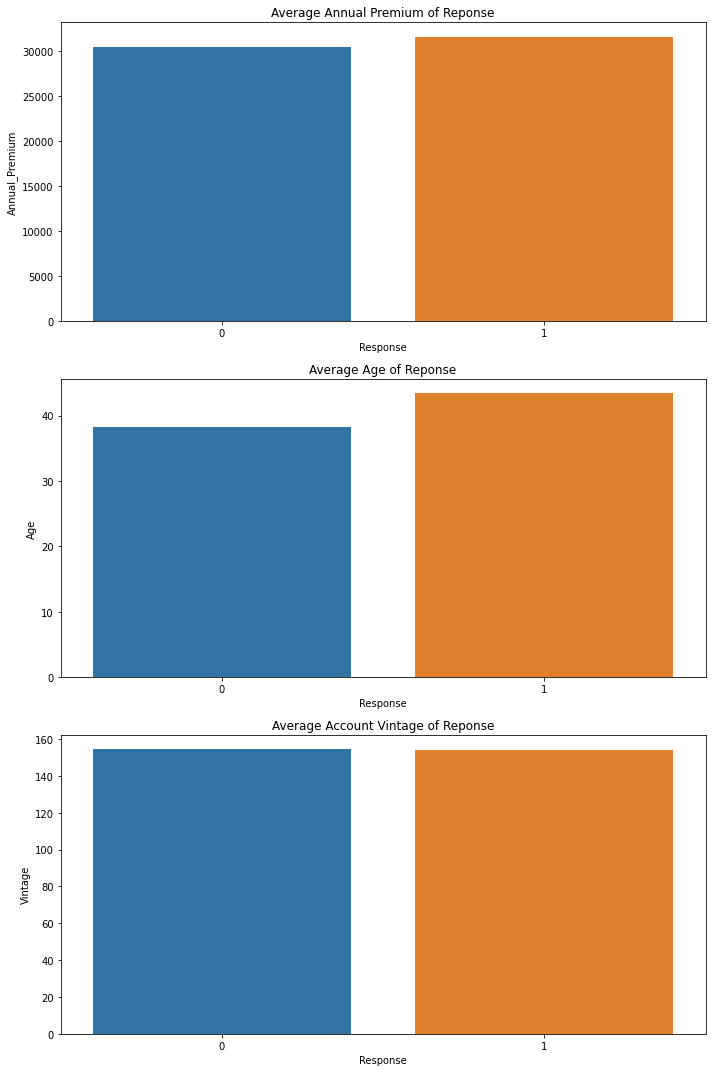

In [33]:
fig, ax = plt.subplots(3,1,figsize=(10,15))
sns.barplot(data=mean, x=mean.index, y='Annual_Premium', ax=ax[0],ci=68)
sns.barplot(data=mean, x=mean.index, y='Age', ax=ax[1], ci=68)
sns.barplot(data=mean, x=mean.index, y='Vintage', ci=68, ax=ax[2])
ax[0].set_title('Average Annual Premium of Reponse')
ax[1].set_title('Average Age of Reponse')
ax[2].set_title('Average Account Vintage of Reponse')
plt.tight_layout()
fig.show()

In [34]:
list(insur['Policy_Sales_Channel'].unique())

[26.0,
 152.0,
 160.0,
 124.0,
 14.0,
 13.0,
 30.0,
 156.0,
 163.0,
 157.0,
 122.0,
 19.0,
 22.0,
 15.0,
 154.0,
 16.0,
 52.0,
 155.0,
 11.0,
 151.0,
 125.0,
 25.0,
 61.0,
 1.0,
 86.0,
 31.0,
 150.0,
 23.0,
 60.0,
 21.0,
 121.0,
 3.0,
 139.0,
 12.0,
 29.0,
 55.0,
 7.0,
 47.0,
 127.0,
 153.0,
 78.0,
 158.0,
 89.0,
 32.0,
 8.0,
 10.0,
 120.0,
 65.0,
 4.0,
 42.0,
 83.0,
 136.0,
 24.0,
 18.0,
 56.0,
 48.0,
 106.0,
 54.0,
 93.0,
 116.0,
 91.0,
 45.0,
 9.0,
 145.0,
 147.0,
 44.0,
 109.0,
 37.0,
 140.0,
 107.0,
 128.0,
 131.0,
 114.0,
 118.0,
 159.0,
 119.0,
 105.0,
 135.0,
 62.0,
 138.0,
 129.0,
 88.0,
 92.0,
 111.0,
 113.0,
 73.0,
 36.0,
 28.0,
 35.0,
 59.0,
 53.0,
 148.0,
 133.0,
 108.0,
 64.0,
 39.0,
 94.0,
 132.0,
 46.0,
 81.0,
 103.0,
 90.0,
 51.0,
 27.0,
 146.0,
 63.0,
 96.0,
 40.0,
 66.0,
 100.0,
 95.0,
 123.0,
 98.0,
 75.0,
 69.0,
 130.0,
 134.0,
 49.0,
 97.0,
 38.0,
 17.0,
 110.0,
 80.0,
 71.0,
 117.0,
 58.0,
 20.0,
 76.0,
 104.0,
 87.0,
 84.0,
 137.0,
 126.0,
 68.0,
 67.0,
 101.0,


## Feature Engineering


Feature Engineering is a large part of the data science process. Below we will use some of the information we were able to extract from our EDA to shape new features for our data. These further features may be able to give us deeper insight and may give our model more purchase so that it can possibly form better predictions.

In [35]:
insur

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [36]:
insur.drop(columns='id', axis=1, inplace=True)

In [37]:
insur

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [38]:
insur['Prem_To_Date'] = round(insur['Annual_Premium']*(insur['Vintage']/365), 2)

In [39]:
insur

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Prem_To_Date
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,24050.73
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,16813.94
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,2832.71
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,15916.87
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,2937.93
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0,7273.86
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0,14361.91
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0,15490.41
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0,9045.64


In [159]:
insur.groupby(by='Policy_Sales_Channel').mean().sort_values(by='Annual_Premium', ascending=False).head(30)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Prem_To_Date,prem_cost_day,new_cust,middle_cust,longterm_cust
Policy_Sales_Channel,,,,,,,,,,,,,,,
74.0,0.000000,47.000000,1.000000,8.000000,0.500000,0.000000,0.500000,70359.500000,180.500000,0.000000,45328.730000,192.765000,0.500000,1.0,0.500000
43.0,1.000000,45.000000,1.000000,28.000000,0.000000,0.000000,1.000000,57744.000000,277.000000,1.000000,43822.160000,158.200000,0.000000,1.0,1.000000
62.0,0.666667,52.833333,1.000000,28.000000,0.666667,0.000000,0.333333,49673.000000,186.833333,0.166667,27462.538333,136.093333,0.333333,1.0,0.500000
115.0,1.000000,62.750000,1.000000,40.000000,0.750000,0.000000,0.250000,47551.000000,182.000000,0.000000,19075.497500,130.277500,0.250000,1.0,0.750000
123.0,0.000000,45.000000,1.000000,28.000000,0.000000,0.000000,1.000000,47383.000000,223.000000,1.000000,28949.070000,129.820000,0.000000,1.0,1.000000
80.0,0.857143,52.428571,1.000000,13.642857,0.214286,0.142857,0.785714,45691.714286,153.928571,0.285714,20418.137143,125.182857,0.285714,1.0,0.285714
59.0,0.566929,52.976378,0.992126,26.503937,0.204724,0.283465,0.755906,44514.818898,148.448819,0.196850,18570.291024,121.958661,0.354331,1.0,0.299213
147.0,0.614130,52.298913,0.989130,27.315217,0.282609,0.331522,0.668478,44183.260870,153.076087,0.184783,18297.371522,121.050598,0.326087,1.0,0.320652
73.0,0.769231,46.846154,1.000000,13.923077,0.230769,0.307692,0.846154,43268.769231,162.923077,0.076923,21418.087692,118.544615,0.307692,1.0,0.384615


Here we use `Annual_Premium` to derive some more continuous numeric features when combined with `Vintage`. 

In [41]:
insur['prem_cost_day'] = round(insur['Annual_Premium']/365, 2)

In [42]:
insur

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Prem_To_Date,prem_cost_day
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,24050.73,110.83
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,16813.94,91.88
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,2832.71,104.92
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,15916.87,78.41
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,2937.93,75.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0,7273.86,82.66
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0,14361.91,109.63
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0,15490.41,96.21
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0,9045.64,122.24


Here we use `Vintage` to separate customers into 3 categories depending on the length they have had their health insurance policy.

In [43]:
insur['new_cust'] = insur['Vintage'].map(lambda x: 1 if x<100 else 0)

In [44]:
insur['middle_cust'] = insur['Vintage'].map(lambda x: 1 if x>=100 & x<=200 else 0)

In [45]:
insur['longterm_cust'] = insur['Vintage'].map(lambda x: 1 if x>200 else 0)

In [46]:
insur

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Prem_To_Date,prem_cost_day,new_cust,middle_cust,longterm_cust
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1,24050.73,110.83,0,1,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0,16813.94,91.88,0,1,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1,2832.71,104.92,1,1,0
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0,15916.87,78.41,0,1,1
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0,2937.93,75.33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,74,1,26.0,1,0,0,30170.0,26.0,88,0,7273.86,82.66,1,1,0
381105,1,30,1,37.0,1,1,0,40016.0,152.0,131,0,14361.91,109.63,0,1,0
381106,1,21,1,30.0,1,1,0,35118.0,160.0,161,0,15490.41,96.21,0,1,0
381107,0,68,1,14.0,0,2,1,44617.0,124.0,74,0,9045.64,122.24,1,1,0


# Train-Test Split <a name='traintest'></a>

Train-test splitting your dataset is valuable, as it is important that your test data hasn't been seen by the model. Models work to generalize well on data that it has seen and learned, but in order to validate you need a testing (or validation) set to make sure that the model generalized enough and neither overfitted or underfitted.

**Overfitting** and **Underfitting** are both plagues to Machine Learning. 

* **Overfitting** means the model has learned the patterns and noise in the training data so well that it can't generalize to any unseen data.


* **Underfitting** is when a model can neither generalize to the training data nor to the new data.

As stated above a train-test split allows us to test for these conditions of the data.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
y = insur['Response']
X = insur.drop('Response', axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

# Class Imbalance <a name='classimb'></a>

The first major issue that we are running into is the major class imbalance between our two dependent classes. This will produce a model with a high accuracy but will be a failure in generalizing for the minority class. In this problem we are looking to find the minority class. 

Classification via Machine Learning is based upon the assumption of roughly balanced classes. This provides an interesting landscape for problems to arise because in many real datasets the classes can be anywhere from roughly balanced, to slightly imbalanced, to severely imbalanced. Therefore, as data scientists must find methods to satisfy the assumption of rough balance between predictive classes. 

Classically, there are several methods of class balancing that data science pioneers have developed. The major methods are **Oversampling**, **Undersampling**, **Synthetic Sampling**, and **Penalization**. 

* **Oversampling -** this method takes the minority sample and draws more samples from it at random.
* **Undersampling -** this method randomly draws less samples from the majority class.
* **Synthetic Sampling -** this method creates random samples based off of the provided training data.
* **Penalization -** this method will increase the cost of a decision for an algorithm making the decision towards the majority class, therefore making it more likely that the algorithm will select the minority class.

In 2011 a paper was written that broke new ground in class balancing methods. It introduced **Synthetic Minority Oversampling Technique** or **SMOTE** for short. SMOTE functions through synthetic sampling and oversampling to produce samples that balance the classes. 

> … SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

> — Page 47, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

SMOTE is evaluated using the area under the Receiver Operating Characteristic curve (AUC) and the ROC convex hull strategy. 

ROC Convex can be explined intuitively [here](https://stats.stackexchange.com/questions/120361/what-is-the-convex-hull-in-roc-curve) with this image: 
<img src='conves_hull.png'>

We have chose to use the SMOTE method for class balancing in our model for these reasons.

In [50]:
print("Yes's are {}% of the data.".format(round(y.value_counts()[1]/y.value_counts()[0]*100, 3)))

Yes's are 13.968% of the data.


In [51]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [52]:
from imblearn.over_sampling import SMOTENC

In [53]:
print(list(X_train.columns))
cats = ['Gender', 'Driving_License', 'Region_Code', 'new_cust', 'middle_cust',
        'Previously_Insured', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Vehicle_Age',
        'longterm_cust']
cat_idx = []
for col in cats:
    cat_idx.append(X_train.columns.get_loc(col))

cat_idx

['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Prem_To_Date', 'prem_cost_day', 'new_cust', 'middle_cust', 'longterm_cust']


[0, 2, 3, 12, 13, 4, 6, 8, 5, 14]

In [54]:
oversample = SMOTENC(categorical_features=cat_idx, random_state=42)
X_train_bal, y_train_bal = oversample.fit_resample(X_train, y_train)

In [55]:
print(X_train_bal.shape)
print(y_train_bal.shape)

(448296, 15)
(448296,)


In [56]:
pd.Series(y_train_bal).value_counts()

1    224148
0    224148
dtype: int64

In [57]:
cols = list(insur.columns)
cols.remove('Response')
pd.DataFrame(X_train_bal, columns=cols)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prem_To_Date,prem_cost_day,new_cust,middle_cust,longterm_cust
0,1.0,57.000000,1.0,28.0,0.0,0.0,1.0,51106.000000,26.0,286.000000,40044.700000,140.020000,0.0,1.0,1.0
1,1.0,63.000000,1.0,24.0,0.0,0.0,1.0,31478.000000,124.0,13.000000,1121.130000,86.240000,1.0,1.0,0.0
2,1.0,20.000000,1.0,17.0,1.0,1.0,0.0,29494.000000,160.0,218.000000,17615.590000,80.810000,0.0,1.0,1.0
3,0.0,20.000000,1.0,37.0,0.0,1.0,1.0,33245.000000,160.0,27.000000,2459.220000,91.080000,1.0,1.0,0.0
4,1.0,66.000000,1.0,8.0,0.0,0.0,1.0,37758.000000,124.0,73.000000,7551.600000,103.450000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448291,1.0,46.432990,1.0,28.0,0.0,0.0,1.0,2630.000000,26.0,245.078763,1765.910399,7.210000,0.0,1.0,1.0
448292,1.0,40.136835,1.0,28.0,0.0,0.0,1.0,39641.794423,26.0,66.000000,7168.101900,108.606712,1.0,1.0,0.0
448293,0.0,31.448644,1.0,28.0,0.0,0.0,1.0,29459.807054,124.0,118.000000,9523.993456,80.713396,0.0,1.0,0.0
448294,1.0,65.696780,1.0,28.0,0.0,0.0,1.0,2630.000000,26.0,294.383870,2121.175784,7.210000,0.0,1.0,1.0


<img src='model.png'>

# Model <a name='model'></a>

## Decision Tree

Decision trees are a method of supervised learning that takes data and provides predictions by learning simple rules that are inferred from the data. Decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. Deeper trees mean more complex decisions and a more fit model.

Decision Trees are simple and function for both numeric and categoric data. It is very interpretable and the data doesn't require much preparation before modeling. The model is fairly robust against violation of core assumptions.

Unfortunately, Decision Trees have several downsides as well. Decision trees are prone to overfitting to your data unless pruning and depth management techniques are use. Small variations in the data can grow wildly different trees. Data balance can create heavily biased trees, therefore it is required to balance classes.

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score
from sklearn.metrics import recall_score, precision_recall_curve, confusion_matrix, roc_curve
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn import metrics

In [59]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('dtclf', DecisionTreeClassifier())])

In [60]:
parameters = [{
             'dtclf__criterion':('gini', 'entropy'), 
             'dtclf__splitter':('best', 'random'),
             'dtclf__max_depth':(None, 2, 5),
              'dtclf__min_samples_leaf':(1,2,3),
             'dtclf__min_samples_split':(2, 4, 6),
             'dtclf__max_features':('auto', 'sqrt', 'log2'),
             'dtclf__random_state':([42])}]

In [61]:
dt_clf = GridSearchCV(pipe, parameters, scoring='recall', verbose=True, n_jobs=-1)

In [62]:
dt_clf.fit(X_train_bal, y_train_bal)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  3.2min finished


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dtclf', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'dtclf__criterion': ('gini', 'entropy'),
                          'dtclf__max_depth': (None, 2, 5),
                          'dtclf__max_features': ('auto', 'sqrt', 'log2'),
                          'dtclf__min_samples_leaf': (1, 2, 3),
                          'dtclf__min_samples_split': (2, 4, 6),
                          'dtclf__random_state': [42],
                          'dtclf__splitter': ('best', 'random')}],
             scoring='recall', verbose=True)

In [63]:
dt_clf.best_params_

{'dtclf__criterion': 'entropy',
 'dtclf__max_depth': 5,
 'dtclf__max_features': 'auto',
 'dtclf__min_samples_leaf': 1,
 'dtclf__min_samples_split': 2,
 'dtclf__random_state': 42,
 'dtclf__splitter': 'best'}

Decision Tree Classifier: ROC AUC = 80.01%
Confusion Matrix:


array([[74477, 35774],
       [ 2365, 13150]], dtype=int64)

Normalized Confusion Matrix:


array([[0.67552222, 0.32447778],
       [0.15243313, 0.84756687]])

              precision    recall  f1-score   support

           0       0.97      0.68      0.80    110251
           1       0.27      0.85      0.41     15515

    accuracy                           0.70    125766
   macro avg       0.62      0.76      0.60    125766
weighted avg       0.88      0.70      0.75    125766

Decision Tree Classifier: Accuracy score = 69.67%
Decision Tree Classifier: F1 Score = 40.81%


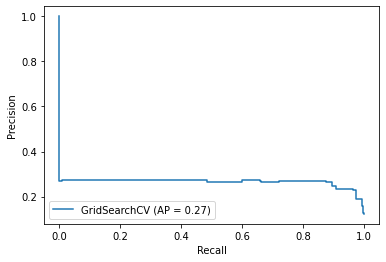

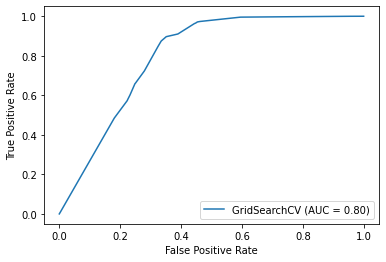

In [65]:
dt_score = test_scores_plots(model=dt_clf, X_test=X_test, y_true=y_test,
                  model_name='Decision Tree Classifier')

## Random Forest Classifier

Random Forests are an ensemble method of supervised learning that averages a group of trees grown from slightly different parameters. These parameters are randomized so that each tree is slightly different. Each sample for the tree is drawn with replacement from a training set. The `max_features` parameter is also randomized and best splits are found from all inputs or a random selection of size according to your `max_features`. These two injections of randomness combine to make the model resilient against prediction error, as some error cancel out. Random Forest reduce variance and thus overall generally produce a better model than single grown trees.

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('rfclf', RandomForestClassifier(criterion= 'entropy',
                                                  max_depth = 5,
                                                  max_features = 'auto',
                                                  min_samples_leaf= 1,
                                                  min_samples_split = 2,
                                                  random_state = 42,
                                                  n_jobs=8))])

In [68]:
bg_clf = pipe

In [69]:
bg_clf.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rfclf',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        n_jobs=8, random_state=42))])

In [70]:
bg_clf.named_steps['rfclf'].feature_importances_

array([6.24934064e-03, 1.09921062e-01, 5.62033408e-04, 3.96792552e-02,
       3.29062020e-01, 9.14023586e-02, 3.34205629e-01, 5.45120189e-03,
       7.52096906e-02, 2.56271429e-04, 2.10327741e-03, 5.85169691e-03,
       1.58545358e-05, 0.00000000e+00, 3.03080838e-05])

Bagging Classifier Random Forest: ROC AUC = 83.5%
Confusion Matrix:


array([[76553, 33698],
       [ 1846, 13669]], dtype=int64)

Normalized Confusion Matrix:


array([[0.69435198, 0.30564802],
       [0.11898163, 0.88101837]])

              precision    recall  f1-score   support

           0       0.98      0.69      0.81    110251
           1       0.29      0.88      0.43     15515

    accuracy                           0.72    125766
   macro avg       0.63      0.79      0.62    125766
weighted avg       0.89      0.72      0.77    125766

Bagging Classifier Random Forest: Accuracy score = 71.74%
Bagging Classifier Random Forest: F1 Score = 43.48%


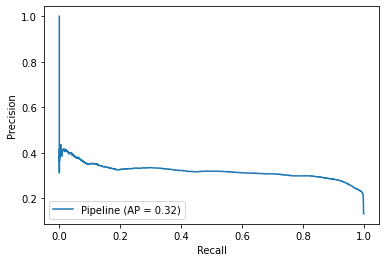

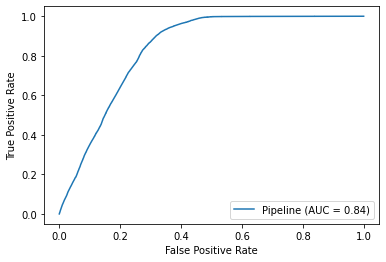

In [71]:
rf_score = test_scores_plots(model=bg_clf, X_test=X_test,
                  y_true=y_test, model_name='Bagging Classifier Random Forest')

## K-Nearest Neighbors



Nearest neighbors classification is a form of instance based or non-generalizing learning. It does not attempt to construct a model, but instead stores a full dataset. The model is then constructed from a simple majority vote of the nearest neighbors. The data class is assigned by the most representative points of the nearest neighbors.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
params = {
    'n_neighbors':(5,10,15),
    'weights':('uniform','distance'),
    'algorith':('auto','ball_tree','kd_tree'),
    'leaf_size':(30, 40, 50),
    'p':(1,2),
}

In [73]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knnclf', KNeighborsClassifier(n_jobs=10))])

In [74]:
kn_clf = GridSearchCV(pipe, params, n_jobs=-1)

In [75]:
kn_clf = pipe
kn_clf.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knnclf', KNeighborsClassifier(n_jobs=10))])

K-Nearest Neighbors: ROC AUC = 79.74%
Confusion Matrix:


array([[88219, 22032],
       [ 5894,  9621]], dtype=int64)

Normalized Confusion Matrix:


array([[0.80016508, 0.19983492],
       [0.37989043, 0.62010957]])

              precision    recall  f1-score   support

           0       0.94      0.80      0.86    110251
           1       0.30      0.62      0.41     15515

    accuracy                           0.78    125766
   macro avg       0.62      0.71      0.64    125766
weighted avg       0.86      0.78      0.81    125766

K-Nearest Neighbors: Accuracy score = 77.8%
K-Nearest Neighbors: F1 Score = 40.79%


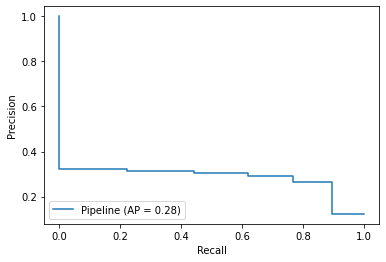

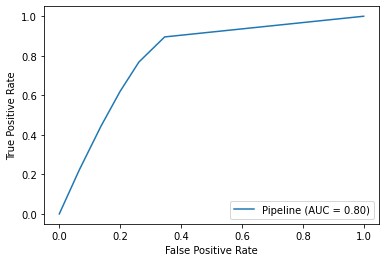

In [76]:
knn_score = test_scores_plots(model=kn_clf, X_test=X_test, y_true=y_test,
                  model_name='K-Nearest Neighbors')

## XGBoost Classifier

XGBoost, or Extreme Gradient Boosting, is a library package for machine learning that was developed by Tianqi Chen as a research project.

>"The name xgboost, though, actually refers to the engineering goal to push the limit of computations resources for boosted tree algorithms. Which is the reason why many people use xgboost."
— **Tianqi Chen**

XGboost was developed in C++, but was later deployed in Python, R, Julia, and Java. 

The library supports many features from Sci-kit Learn with new additions. The three main forms of gradient boosting supported by the packages are: 
*  **Gradient Boosting**
*  **Stochastic Gradient Boosting**
*  **Regularized Gradient Boosting**

These are, however not the main goal of the project as stated by Chen in the above quote. The system features are the real spot light for XGBoost. The system features are:

*  Parallelization of tree construction using all of your CPU cores during training.
*  Distributed Computing for training very large models using a cluster of machines.
*  Out-of-Core Computing for very large datasets that don’t fit into memory.
*  Cache Optimization of data structures and algorithm to make best use of hardware.

Finally the package was developed with some algorithmic considerations in mind:
*  Sparse Aware with automatic handing of missing data values
*  Block structure to support parallelization of tree growing
*  Continued Training so that a fitted model may be further boosted on new data.

These all combine into the major features of the library:
*  Speed
*  Model Performance

All of these features make for a robust ecosystem in which to grow and build gradient boosted trees.

In [77]:
from xgboost import *
import xgboost

In [187]:
smote_df = pd.DataFrame(X_train_bal, columns=list(X_train.columns))

In [188]:
X_test_array = X_test.to_numpy()
X_train_array = X_train.to_numpy()
y_test_array = y_test.to_numpy()
y_train_array = y_train.to_numpy()

In [189]:
dtrain = xgboost.DMatrix(X_train_bal, y_train_bal)
dtest = xgboost.DMatrix(X_test_array, y_test_array)

In [190]:
eval_set = [(X_train_bal, y_train_bal),(X_test_array, y_test_array)]

In [191]:
watch = [(dtrain, 'train'), (dtest, 'valid')]
# nrounds=10000

In [216]:
## Objective - What the tree is going to be used for 
## Colsample_bytree - The ratio of columns subsampled when constructing each tree
## Gamma - Min loss reduction required to make a split
## Reg_lambda - L2 regularization term on weights
## Min_child_weight - Minimum sum of instance weight needed in a child
## Learning_rate - Step update to prevent overfit
## Eval_metric - The metric to evaluate the tree on

bst = XGBRFClassifier(max_depth = 5, n_estimators = 1000, objective = 'binary:logistic',
                    colsample_bytree = 0.8, gamma = 0.1, reg_lambda = 1e-05, 
                    reg_alpha = 2.5, min_child_weight = 1, learning_rate = 0.1,
                    eval_metric = 'auc', nthread=-1, n_jobs = 10,
                    eval_set=watch).fit(X_train_bal, y_train_bal)

[14:54:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { eval_set } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [217]:
bst

XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=0.8, eval_metric='auc',
                eval_set=[(<xgboost.core.DMatrix object at 0x0000020A640F6EB8>,
                           'train'),
                          (<xgboost.core.DMatrix object at 0x0000020A640F6EF0>,
                           'valid')],
                gamma=0.1, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.1, max_delta_step=0,
                max_depth=5, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=1000, n_jobs=10,
                nthread=-1, num_parallel_tree=1000, objective='binary:logistic',
                random_state=0, reg_alpha=2.5, scale_pos_weight=1,
                tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost: ROC AUC = 83.95%


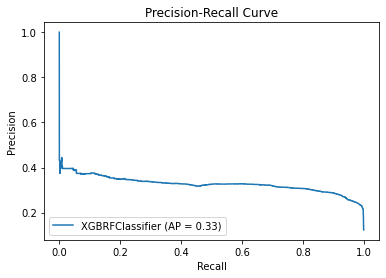

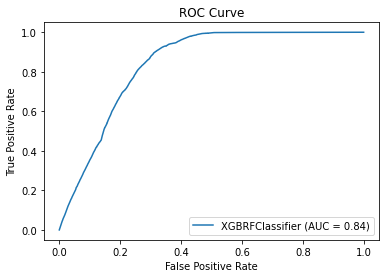

Confusion Matrix:


array([[79630, 30621],
       [ 2484, 13031]], dtype=int64)

Normalized Confusion Matrix:


array([[0.72226102, 0.27773898],
       [0.16010313, 0.83989687]])

              precision    recall  f1-score   support

           0       0.97      0.72      0.83    110251
           1       0.30      0.84      0.44     15515

    accuracy                           0.74    125766
   macro avg       0.63      0.78      0.63    125766
weighted avg       0.89      0.74      0.78    125766

XGBoost: Accuracy score = 73.68%
XGBoost: F1 Score = 44.05%


0.8394502839714587

In [218]:
test_scores_plots(model=bst, X_test=X_test_array, y_true=y_test_array, model_name='XGBoost')

## Catboost Classifier

The goal of training is to select the model , depending on a set of features , that best solves the given problem (regression, classification, or multiclassification) for any input object. This model is found by using a training dataset, which is a set of objects with known features and label values. Accuracy is checked on the validation dataset, which has data in the same format as in the training dataset, but it is only used for evaluating the quality of training (it is not used for training).

CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees.

[CatBoost](https://catboost.ai/docs/concepts/algorithm-main-stages.html)

In [93]:
from catboost import CatBoostClassifier, Pool

In [94]:
test_data = catboost_pool = Pool(X_test_array, 
                                 y_test_array)

In [280]:
## Loss_function - 
## Learning_rate - step size to prevent overfitting
## Bootstrap_type - The method of bootstrapping for re-sample
## Subsample - The amount to subsample from in order to construct a new tree
## Custom_loss - the loss function used to determine best tree

model = CatBoostClassifier(iterations = 5000, 
                                random_seed = 42, 
                                task_type = 'CPU',
                                learning_rate=0.1,
                                depth=5,
                                loss_function='Logloss',
                                bootstrap_type='MVS',
                                subsample = 0.5,
                                eval_metric='Recall',
                                od_type='Iter',
                                od_wait=100
                                )

# od_type='Iter', od_wait=250

In [281]:
model.fit(X_train_bal, y_train_bal, eval_set=test_data)

0:	learn: 0.9600933	test: 0.8663874	best: 0.8663874 (0)	total: 47.7ms	remaining: 3m 58s
1:	learn: 0.9404456	test: 0.8177248	best: 0.8663874 (0)	total: 91.4ms	remaining: 3m 48s
2:	learn: 0.9581393	test: 0.8580084	best: 0.8663874 (0)	total: 135ms	remaining: 3m 44s
3:	learn: 0.9532630	test: 0.8363519	best: 0.8663874 (0)	total: 178ms	remaining: 3m 42s
4:	learn: 0.9431849	test: 0.8188205	best: 0.8663874 (0)	total: 220ms	remaining: 3m 39s
5:	learn: 0.9507022	test: 0.8412504	best: 0.8663874 (0)	total: 261ms	remaining: 3m 37s
6:	learn: 0.9500152	test: 0.8328714	best: 0.8663874 (0)	total: 305ms	remaining: 3m 37s
7:	learn: 0.9486768	test: 0.8303577	best: 0.8663874 (0)	total: 349ms	remaining: 3m 37s
8:	learn: 0.9501669	test: 0.8319691	best: 0.8663874 (0)	total: 388ms	remaining: 3m 35s
9:	learn: 0.9487928	test: 0.8292620	best: 0.8663874 (0)	total: 428ms	remaining: 3m 33s
10:	learn: 0.9484939	test: 0.8263616	best: 0.8663874 (0)	total: 463ms	remaining: 3m 29s
11:	learn: 0.9513134	test: 0.8249436	bes

96:	learn: 0.9198387	test: 0.5630035	best: 0.8663874 (0)	total: 4.28s	remaining: 3m 36s
97:	learn: 0.9192810	test: 0.5604254	best: 0.8663874 (0)	total: 4.32s	remaining: 3m 36s
98:	learn: 0.9195353	test: 0.5579117	best: 0.8663874 (0)	total: 4.36s	remaining: 3m 36s
99:	learn: 0.9186743	test: 0.5544956	best: 0.8663874 (0)	total: 4.41s	remaining: 3m 35s
100:	learn: 0.9188929	test: 0.5526265	best: 0.8663874 (0)	total: 4.45s	remaining: 3m 35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8663873671
bestIteration = 0

Shrink model to first 1 iterations.


CatBoost: ROC AUC = 81.83%


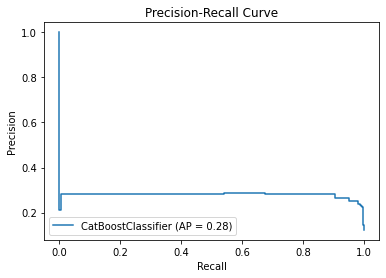

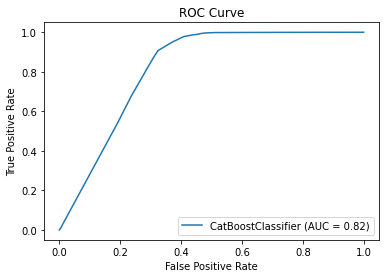

Confusion Matrix:


array([[76381, 33870],
       [ 2073, 13442]], dtype=int64)

Normalized Confusion Matrix:


array([[0.6927919 , 0.3072081 ],
       [0.13361263, 0.86638737]])

              precision    recall  f1-score   support

           0       0.97      0.69      0.81    110251
           1       0.28      0.87      0.43     15515

    accuracy                           0.71    125766
   macro avg       0.63      0.78      0.62    125766
weighted avg       0.89      0.71      0.76    125766

CatBoost: Accuracy score = 71.42%
CatBoost: F1 Score = 42.79%


0.8183424198028573

In [282]:
test_scores_plots(model=model, X_test=X_test, y_true=y_test, model_name='CatBoost')

# Best Model Evaluation <a name='bestmodel'></a>

In [240]:
import shap

After our modeling process we have found that CatBoost was able to produce the best model as based on the `Recall` metric. Recall is metric we have chosen. Looking to our business case it is more important to locate the most `True Positives` with allowing some negatives to slip in as it would be to wrongly classify something an allow a potential sale to slip by.  

<img src="recall.png">

In [241]:
feats = pd.DataFrame(list(zip(list(X_train.columns), list(model.feature_importances_))),
                     columns=['feature', 'importance']).sort_values(by='importance',
                                                                   ascending=False)
feats = feats[feats['importance'] > 0]

In [242]:
feats

,feature,importance
4,Previously_Insured,62.088544
6,Vehicle_Damage,20.741406
5,Vehicle_Age,7.372709
3,Region_Code,5.542045
1,Age,4.255296


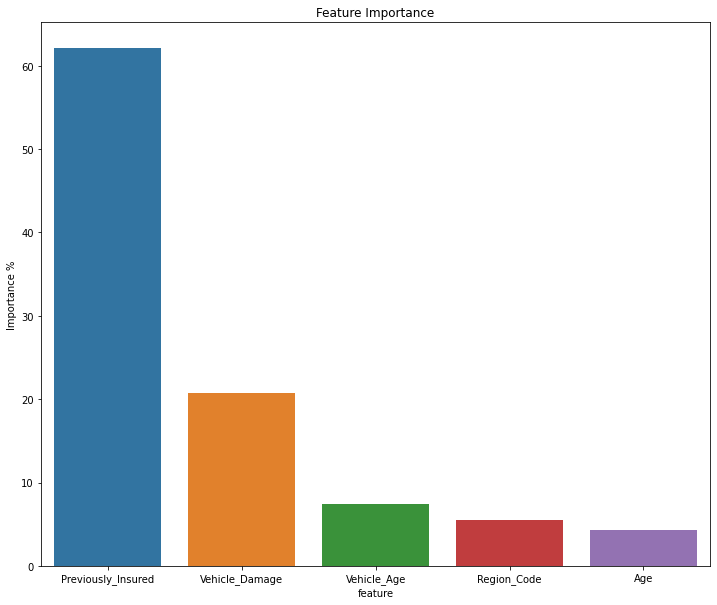

In [243]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
sns.barplot(data=feats, x='feature', y='importance', ax=ax)
plt.title('Feature Importance')
plt.ylabel('Importance %')
plt.show()

## SHAP Explainer

In [244]:
idx = feats.index

In [245]:
shap_values = model.get_feature_importance(Pool(X_test, label=y_test), 
                                                type="ShapValues")
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()

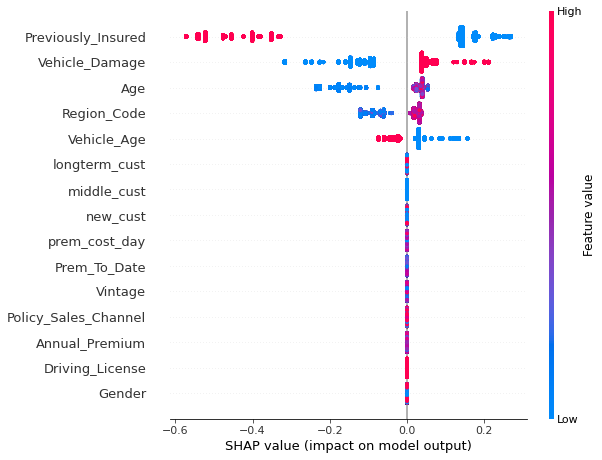

In [246]:
shap.summary_plot(shap_values, X_test)

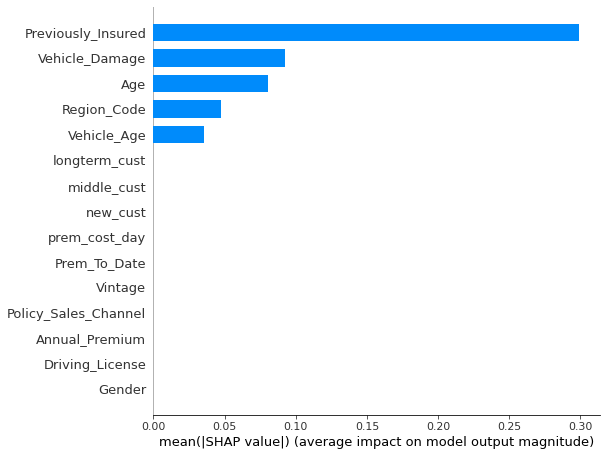

In [247]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Important Take-Aways

The most important take aways from the feature importance section of our model is that:
*  **It is important to only target those individuals without Vehicle insurance.**
*  **Customers with previous vehicle damage are more likely to agree to the cross sale.**
* **Younger people are less likely to purchase the cross-sell**

How did we come to this determination?

SHAP Values. 

> SHAP values are based on Shapley values, a concept coming from game theory. But game theory needs at least two things: a game and some players. How does this apply to machine learning explainability? Imagine that we have a predictive model, then:

> * the “game” is reproducing the outcome of the model,
> * the “players” are the features included in the model.

>What Shapley does is quantifying the contribution that each player brings to the game. What SHAP does is quantifying the contribution that each feature brings to the prediction made by the model. 

>It is important to stress that what we called a “game” concerns a single observation. One game: one observation. Indeed, SHAP is about local interpretability of a predictive model.

[SHAP values explained exactly how you wished someone explained to you - Towards Data Science](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30)

In [169]:
insur.groupby('Previously_Insured').agg(lambda x:x.value_counts().index[0])

,Gender,Age,Driving_License,Region_Code,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Prem_To_Date,prem_cost_day,new_cust,middle_cust,longterm_cust
Previously_Insured,,,,,,,,,,,,,,,
0,1,24,1,28.0,0,1,2630.0,26.0,73,0,216.16,7.21,0,1,0
1,0,24,1,28.0,1,0,2630.0,152.0,256,0,1578.00,7.21,0,1,0


In [296]:
insur['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

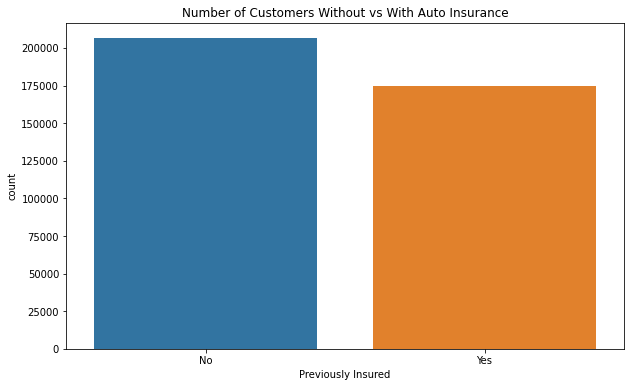

In [297]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot(data=insur, x='Previously_Insured', ax=ax)
plt.title('Number of Customers Without vs With Auto Insurance')
plt.xlabel('Previously Insured')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()

We will take a look at a few of the factors of importance that we gathered from the take-away of our modeling. 

**A person that has not been previously insured are:**
* More likely to be Male.
* Generally have a newer vintage.
* More likely to have paid less premium to date.

In [173]:
insur.groupby('Vehicle_Damage').agg(lambda x:x.value_counts().index[0])

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Prem_To_Date,prem_cost_day,new_cust,middle_cust,longterm_cust
Vehicle_Damage,,,,,,,,,,,,,,,
0,0,24,1,28.0,1,1,2630.0,152.0,256,0,1714.90,7.21,0,1,0
1,1,21,1,28.0,0,0,2630.0,26.0,84,0,1260.96,7.21,0,1,0


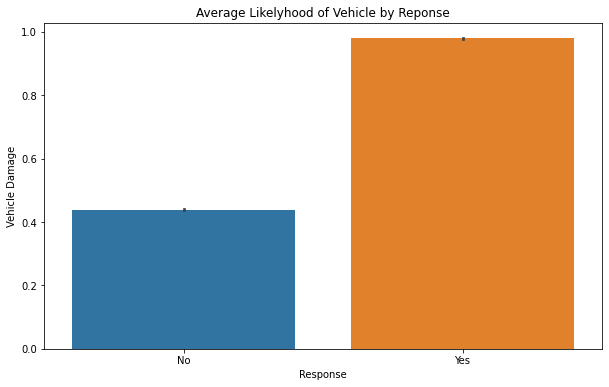

In [298]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=insur, x='Response', y='Vehicle_Damage', ci=68, ax=ax)
plt.title('Average Likelyhood of Vehicle by Reponse')
plt.xlabel('Response')
plt.ylabel('Vehicle Damage')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.show()

**A person that has previous vehicle damage are:**
* More likely to be Male.
* More likely to be younger than those without damage.
* Not currently insured.
* Owned a car for a shorter period of time.
* Has a shorter vintage.

Looking above we see that these share a couple things in common. First is that **Males** are more commonly interested in the cross-sell and that a person interested in a cross-sell generally have a **newer Vintage**. We can use these insights to further drive customer acquisitions.

In [250]:
age = np.linspace(20, 90, 8)

In [258]:
age = list(age)

In [263]:
insur['age_bin'] = pd.cut(insur['Age'], bins=age, labels=[20, 30, 40, 50, 60,
                                      70])

In [268]:
insur.groupby(by=['age_bin', 'Response']).agg(lambda x:x.value_counts().index[0])

Gender  Age  Driving_License  Region_Code  \
age_bin Response                                              
20      0              0   24                1         28.0   
        1              1   24                1         28.0   
30      0              1   40                1         28.0   
        1              1   40                1         28.0   
40      0              1   43                1         28.0   
        1              1   44                1         28.0   
50      0              1   51                1         28.0   
        1              1   51                1         28.0   
60      0              1   61                1         28.0   
        1              1   61                1         28.0   
70      0              1   71                1         28.0   
        1              1   71                1         28.0   

                  Previously_Insured  Vehicle_Age  Vehicle_Damage  \
age_bin Response                                                    
20      0                          1            1               0   
        1                          0            1               1   
30      0                          0            0               1   
        1                          0            0               1   
40      0                          0            0               1   
        1                          0            0               1   
50      0                          0            0               1   
        1                          0            0               1   
60      0                          0            0               1   
        1                          0            0               1   
70      0                          0            0               1   
        1                          0            0               1   

                  Annual_Premium  Policy_Sales_Channel  Vintage  Prem_To_Date  \
age_bin Response                                                                
20      0                 2630.0                 152.0      256       1196.11   
        1                 2630.0                 152.0      125        432.33   
30      0                 2630.0                 124.0      117       1361.84   
        1                 2630.0                 124.0      229       1469.92   
40      0                 2630.0                 124.0       63        526.00   
        1                 2630.0                  26.0       84        691.73   
50      0                 2630.0                  26.0       80       1772.55   
        1                 2630.0                  26.0      200        972.74   
60      0                 2630.0                  26.0      263       2003.12   
        1                 2630.0                  26.0       62        151.32   
70      0                 2630.0                  26.0      222       1152.88   
        1                 2630.0                  26.0      117        843.04   

                  prem_cost_day  new_cust  middle_cust  longterm_cust  
age_bin Response                                                       
20      0                  7.21         0            1              0  
        1                  7.21         0            1              0  
30      0                  7.21         0            1              0  
        1                  7.21         0            1              0  
40      0                  7.21         0            1              0  
        1                  7.21         0            1              0  
50      0                  7.21         0            1              0  
        1                  7.21         0            1              0  
60      0                  7.21         0            1              0  
        1                  7.21         0            1              0  
70      0                  7.21         0            1              0  
        1                  7.21         0            1              0

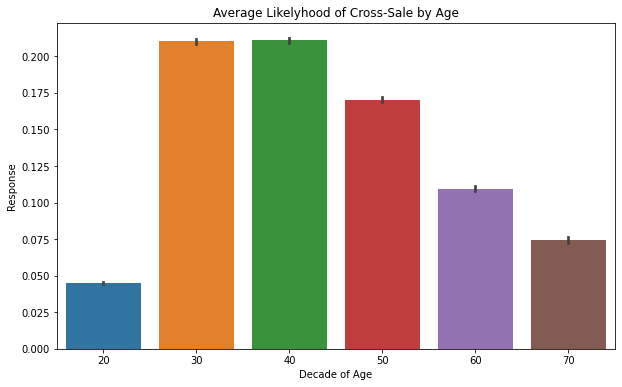

In [284]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(data=insur, x='age_bin', y='Response', ci=68, ax=ax)
plt.title('Average Likelyhood of Cross-Sale by Age')
plt.xlabel('Decade of Age')
plt.show()

Looking to age data we see that the third most influential factor in the prediction of the cross-sell is age. As previously seen the younger the person, the less likely they are to buy into the cross sell. It is best to target a **middle-aged** demographic for the cross-sell.

## The Recommendations

Finally we have worked our way through data retrieval, analysis, and modeling and we have discovered that there are some very important factors influencing the prediction of cross-selling.
1. Does the individual already have auto insurance?
2. Does the individual have any previous auto damage?
3. What is the age group the individual falls into?

From this we drew a few further insights:
* Cross-sell interest is generally Male.
* Those interested have had a health insurance policy less time.

These points could be used to draw from further pools of client and narrow the search.